In [1]:
import numpy as np#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_passenger_id = train[["PassengerId"]]
test_passenger_id = test[["PassengerId"]]
train.set_index(["PassengerId"],inplace=True)
test.set_index(["PassengerId"],inplace=True)

In [8]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
def data_missing_percent(data):
    percent = 100*(data.isnull().sum())/len(data)
    percent = percent[percent>0].sort_values()
    return percent
train_nan_percent=data_missing_percent(train)
test_nan_percent = data_missing_percent(test)

In [11]:
train_nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [12]:
test_nan_percent

Fare      0.239234
Age      20.574163
Cabin    78.229665
dtype: float64

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
new_train = imputer.fit_transform(train.Age.values.reshape(-1,1))
train['Age2'] = new_train


In [14]:
new_test = imputer.fit_transform(test.Age.values.reshape(-1,1))
test['Age2'] = new_test

train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

In [15]:
train["Age2"] = train[["Age2"]].astype(int)
train.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35
6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,29
7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S,54
8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,S,2
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,S,27


In [16]:
test["Age2"] = test[["Age2"]].astype(int)

train.rename(columns={"Age2":"Age"},inplace=True)
test.head(10)

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22
897,3,"Svensson, Mr. Johan Cervin",male,0,0,7538,9.2250,NaN,S,14
898,3,"Connolly, Miss. Kate",female,0,0,330972,7.6292,NaN,Q,30
899,2,"Caldwell, Mr. Albert Francis",male,1,1,248738,29.0000,NaN,S,26
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,0,0,2657,7.2292,NaN,C,18


In [17]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [19]:
train["Embarked"].fillna("s",inplace=True)
test["Embarked"].fillna("s",inplace=True)

In [20]:
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

In [21]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
def bar_chart(data,feature,stacked=True):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["survived","dead"]
    df.plot(kind="bar",stacked=stacked,figsize=(8,5))

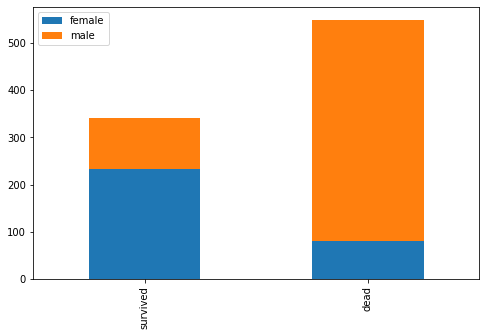

In [23]:
bar_chart(train,"Sex")

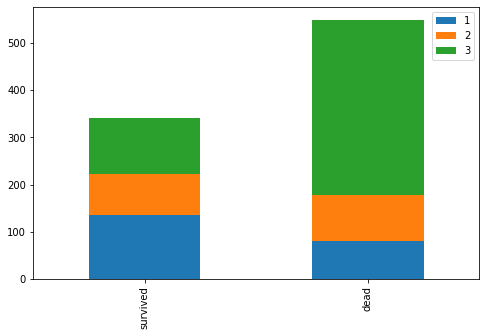

In [24]:
bar_chart(train,"Pclass")

In [25]:
def compare(data,feature,feature2=None):
    plt.figure(figsize=(8,5))
    g=sns.barplot(x=feature,y="Survived",hue=feature2,data=data).set

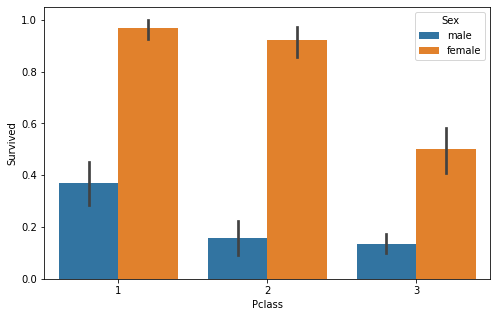

In [26]:
compare(train,"Pclass","Sex")

<AxesSubplot:xlabel='Age', ylabel='Survived'>

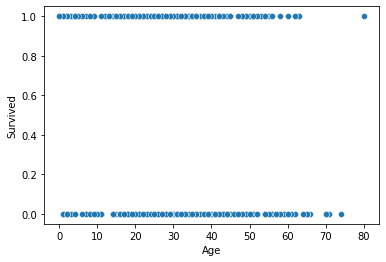

In [27]:
sns.scatterplot(data=train,x="Age",y="Survived")

C:\Users\WONHEECHO\Anaconda3\envs\econo\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\WONHEECHO\Anaconda3\envs\econo\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

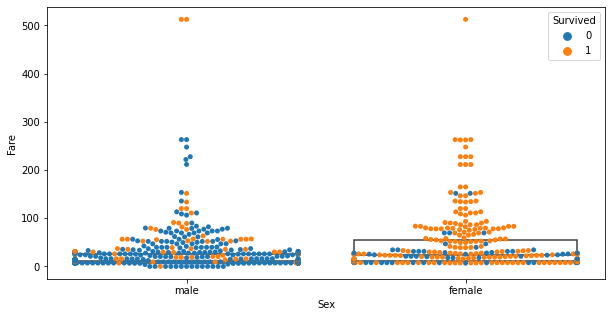

In [28]:
plt.figure(figsize=(10,5))
sns.swarmplot(data=train,y="Fare",x="Sex",hue="Survived")
sns.boxplot(data=train,x="Sex",y="Fare",showcaps=False,
           whiskerprops={'linewidth':0},
           showfliers=False,
           boxprops={'facecolor':'None'})

In [29]:
train_corr = train.corr()


<AxesSubplot:>

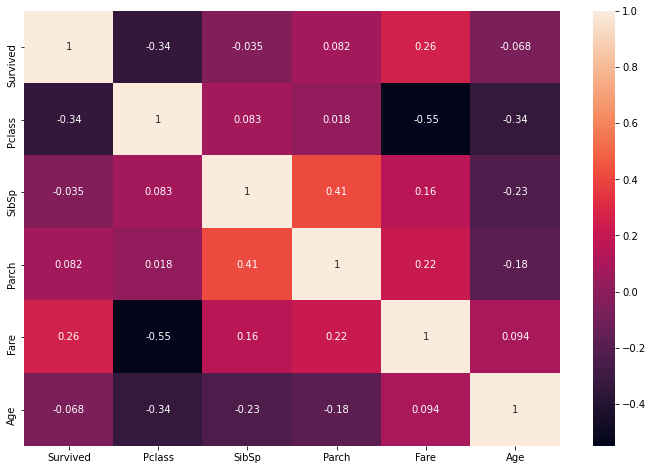

In [30]:
plt.subplots(figsize=(12,8))
sns.heatmap(train_corr,annot=True)

In [31]:
train["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [32]:
train['Title'] = train['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [40]:
test['Title'] = test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [34]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [41]:
test["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

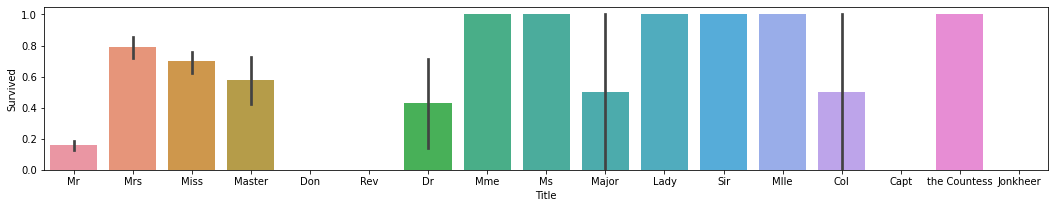

In [42]:
plt.figure(figsize=(18,3))
sns.barplot(data=train,x="Title",y="Survived")

In [44]:
train["family_size"]=train["SibSp"]+train["Parch"]+1

In [46]:
def family_group(size):
    fam = ""
    if(size<=1):
        fam="alone"
    elif(size<=4):
        fam="small fam"
    else:
        fam="large fam"
    return fam

In [47]:
train["family_shape"] = train["family_size"].map(family_group)
train["fare_per_person"] = train["Fare"]/train["family_size"]

In [48]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age,Title,family_size,family_shape,fare_per_person
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22,Mr,2,small fam,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38,Mrs,2,small fam,35.64165
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26,Miss,1,alone,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35,Mrs,2,small fam,26.55000
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35,Mr,1,alone,8.05000


<AxesSubplot:xlabel='family_shape', ylabel='Survived'>

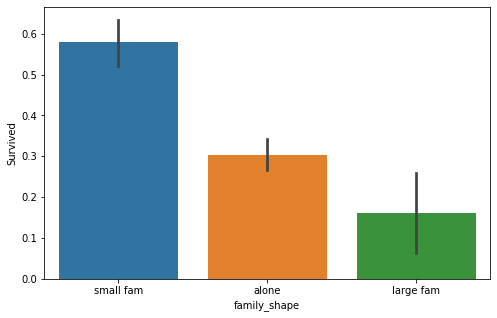

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(data=train,x="family_shape", y="Survived")